# Exercise 2.10

_Consider the data in the table 2.1 Starting with a flat prior for each
energy, find an estimate for the efficiency (success parameter p) as well as an uncertainty. For the estimate of the parameter, take the mode of the posterior probability
for p
and use the smallest interval to find the 68 % probability range. Make a plot
of the result._

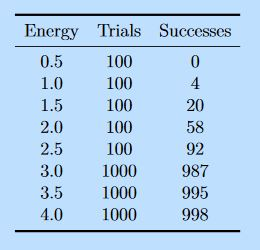

![dataanalysis_2_10_data.JPG](attachment:dataanalysis_2_10_data.JPG)

In [2]:
#Libraries that will be used for this excercise
from math import factorial

import numpy as np #Fast and reliable array calculations and math
import matplotlib.pyplot as plt #Creating and manipulating plots

In [3]:
# Defining numpy arrays of the given data
Energies = np.array([0.5, 1., 1.5, 2., 2.5, 3., 3.5, 4.])
Trials = np.array([100, 100, 100, 100, 100, 1000, 1000, 1000])
Successes = np.array([0,4,20,58,92,987,995,998])

## Bayesian Approach for Binomial distribution
Bayes Theorem:

\begin{equation}
P(p|N,r)=\frac{P(r|N,p) P_{0}(p)}{\int P(r|N,p) P_{0}(p) dp}
\end{equation}

We chose a flat Prior. This means we assign the same probability to all values of $p$. We have no reason to give preference to any value or range of values.

\begin{equation}
P_{0}(p)= const. = 1
\end{equation}

\begin{equation}
P(p|N,r)=\frac{p^{r}(1-p)^{N-r}}{\int_{0}^{1}p^{r}(1-p)^{N-r} dp}
\end{equation}

The integral in the denominator is a standard beta function, $\beta(r+1,N-r+1) = \int_{0}^{1} p^{r}(1-p)^{N-r} dp = \frac{r!(N-r)!}{(N+1)!} $. Solving results in:

\begin{equation}
P(p|N,r)=\frac{(N+1)!}{r!(N-r)!}p^{r}(1-p)^{N-r}~~~.
\end{equation}

This is the Posterior probability distribution for a Binomial with flat prior.

In [4]:
def posterior(p, r, N):# For the Binomial distribution and a flat Prior P_0=1, as given in the lecture.
    factor1 = factorial(N + 1.)/(factorial(r)*factorial(N-r))
    factor2 = pow(p,r) * pow((1. - p),(N - r))
    return factor1 * factor2

In [5]:
# The mode of the posterior with a flat prior is p* = r/N
Efficiencies_estimate = 1.0*Successes / Trials
Efficiencies_estimate

array([ 0.   ,  0.04 ,  0.2  ,  0.58 ,  0.92 ,  0.987,  0.995,  0.998])

In [6]:
#Now we want to draw the Posterior distribution for the data in the table.
stepsize = 1/10000.
p_values = np.arange(0,1,stepsize) #corresponds to our x axis
posterior_values = list() #will be our y axis
for i in range(len(Energies)):
    posterior_values.append([])
    for p in np.arange(0,1,stepsize):
        posterior_values[i].append(posterior(p, Successes[i], Trials[i]))
#posterior_values_array = np.asarray(posterior_values)                                

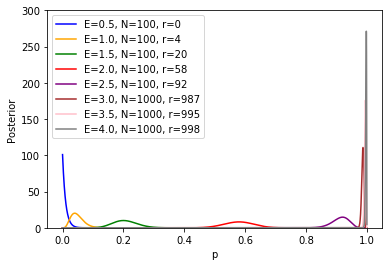

In [7]:
plt.ylim(0,300)
plt.xlabel('p')
plt.ylabel('Posterior')
labels = []
colors = ['blue','orange','green','red','purple','brown','pink','grey']
for i in range(len(Energies)):
    labels.append('E='+ str(Energies[i])+', N='+str(Trials[i])+', r='+str(Successes[i]))
    plt.plot(p_values,posterior_values[i],label=labels[i],color=colors[i])
    
plt.legend()
plt.show()

## Define the Smallest Interval

In [8]:
def smallest_interval(alpha,p_values,posterior_values):
    sorted_list = list(sorted(zip(posterior_values,p_values),reverse=True))# Sort so that the Entry with highest
    #Probability is the first
    p_min=p_max=acc_sum=i_count=0
    #sorted_list[iter][0] = sorted posterior_values
    #sorted_list[iter][0] = sorted p_values
    mode=sorted_list[0][1]
    
    while acc_sum < (1-alpha):
        acc_sum+=sorted_list[i_count][0] *stepsize
        
        if sorted_list[i_count][1]<mode:
            p_min=sorted_list[i_count][1]
        elif sorted_list[i_count][1]>mode:
            p_max = sorted_list[i_count][1]
            
        i_count+=1
    return p_min, p_max, i_count, acc_sum

(0, 0.0111)
(0.023300000000000001, 0.062800000000000009)


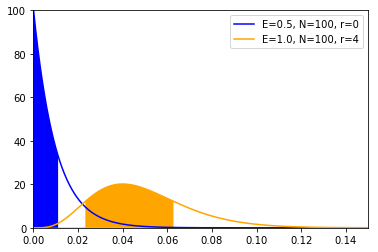

In [9]:
for i in range(2):
    p_min , p_max, p_num, acc_sum= smallest_interval(0.32,p_values,posterior_values[i])
    print(p_min,p_max)
    plt.xlim(0,0.15)
    plt.ylim(0,100)
    plt.plot(p_values,posterior_values[i], label= labels[i],color=colors[i])
    plt.fill_between(p_values,posterior_values[i],where= p_values >=p_min,facecolor=colors[i])
    plt.fill_between(p_values,posterior_values[i],where= p_values >=p_max,facecolor='white')
plt.legend()
plt.show()

(0.16250000000000001, 0.2414)
(0.53090000000000004, 0.62809999999999999)
(0.89030000000000009, 0.94420000000000004)


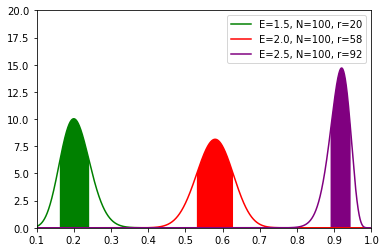

In [10]:
for i in range(2,5):
    p_min , p_max, p_num,acc_sum = smallest_interval(0.32,p_values,posterior_values[i])
    print(p_min,p_max)
    plt.xlim(0.1,1.)
    plt.ylim(0,20)
    plt.plot(p_values,posterior_values[i],label= labels[i],color=colors[i])
    plt.fill_between(p_values,posterior_values[i],where= p_values >=p_min,facecolor=colors[i])
    plt.fill_between(p_values,posterior_values[i],where= p_values >=p_max,facecolor='white')
plt.legend()
plt.show()

(0.98310000000000008, 0.99020000000000008)
(0.99240000000000006, 0.99690000000000001)
(0.99620000000000009, 0.9991000000000001)


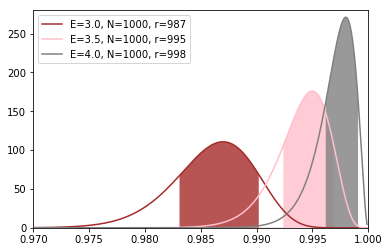

In [11]:
for i in range(5,8):
    p_min , p_max, p_num, acc_sum = smallest_interval(0.32,p_values,posterior_values[i])
    print(p_min,p_max)
    plt.xlim(0.97,1.)
    plt.ylim(0,280)
    plt.plot(p_values,posterior_values[i],label= labels[i],color=colors[i])
    plt.fill_between(p_values,posterior_values[i],where= p_values >=p_min,alpha=0.8,facecolor=colors[i])
    plt.fill_between(p_values,posterior_values[i],where= p_values >=p_max,facecolor='white')
plt.legend()
plt.show()

Get all the numbers at once:

In [12]:
p_mins = list()
p_maxs = list()
print('E \t N \t r \t p_min \t p_max \t p_num \t acc_sum')
for i in range(8):
    p_min , p_max, p_num, acc_sum = smallest_interval(0.32,p_values,posterior_values[i])
    print(str(Energies[i])+'\t'+str(Trials[i])+'\t'+str(Successes[i])+'\t' +  str(p_min)+'\t' + str(p_max)+'\t'+ str(p_num)+ '\t'+ str(acc_sum))
    p_mins.append(p_min)
    p_maxs.append(p_max)


E 	 N 	 r 	 p_min 	 p_max 	 p_num 	 acc_sum
0.5	100	0	0	0.0111	112	0.682825178125
1.0	100	4	0.0233	0.0628	396	0.680682429841
1.5	100	20	0.1625	0.2414	790	0.680184571468
2.0	100	58	0.5309	0.6281	973	0.680448958363
2.5	100	92	0.8903	0.9442	540	0.680032739938
3.0	1000	987	0.9831	0.9902	72	0.681623632099
3.5	1000	995	0.9924	0.9969	46	0.687405423729
4.0	1000	998	0.9962	0.9991	30	0.685437658576


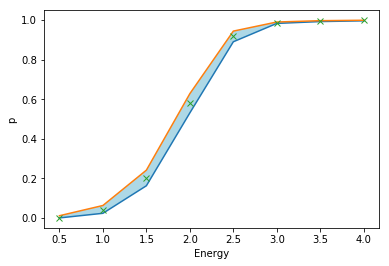

In [13]:
plt.xlabel('Energy')
plt.ylabel('p')
plt.plot(Energies,p_mins)
plt.plot(Energies,p_maxs)
plt.plot(Energies,Efficiencies_estimate, 'x')
plt.fill_between(Energies,p_mins,p_maxs,facecolor='lightblue')
plt.show()

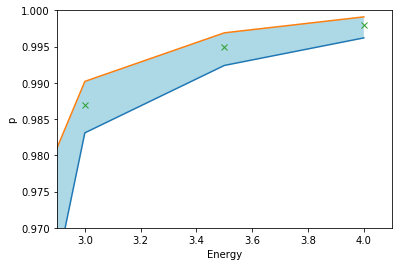

In [14]:
plt.ylim(0.97,1.0)
plt.xlim(2.9,4.1)
plt.xlabel('Energy')
plt.ylabel('p')
plt.plot(Energies,p_mins)
plt.plot(Energies,p_maxs)
plt.plot(Energies,Efficiencies_estimate, 'x')
plt.fill_between(Energies,p_mins,p_maxs,facecolor='lightblue')
plt.show()